<br> Radley Ciego </br>
<br> GTECH 78518: Environmental Data Science </br>
<br> December 11, 2022 </br>
<br> Homework #10 </br>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rioxarray as rxr
import xarray as xr

In [2]:
# read lidar data
pth = '/Users/radleyciego/GitHub/environmental-data-science/data/centralpark_dem_dsm_2017/'
filepth = os.path.join(pth, 'central_park_dem.tif')
dem = rxr.open_rasterio(filepth, masked=True)
dem

<xarray.DataArray (band: 1, y: 13273, x: 9079)>
[120505567 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 9.892e+05 9.892e+05 ... 9.983e+05 9.983e+05
  * y            (y) float64 2.31e+05 2.31e+05 2.31e+05 ... 2.177e+05 2.177e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
# read lidar data
filepth = os.path.join(pth, 'central_park_dsm.tif')
dsm = rxr.open_rasterio(filepth, masked=True)
dsm

<xarray.DataArray (band: 1, y: 13273, x: 9079)>
[120505567 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 9.892e+05 9.892e+05 ... 9.983e+05 9.983e+05
  * y            (y) float64 2.31e+05 2.31e+05 2.31e+05 ... 2.177e+05 2.177e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [4]:
# view the Coordinate Reference System (CRS) & spatial extent for the dem
print(dem.rio.crs)
print(dem.rio.bounds())
# View no data values
print(dem.rio.nodata)

EPSG:6539
(989243.0, 217722.0, 998322.0, 230995.0)
nan


In [7]:
# view the Coordinate Reference System (CRS) & spatial extent for the dsm
print(dsm.rio.crs)
print(dsm.rio.bounds())
# view no data values
print(dsm.rio.nodata)

EPSG:6539
(989242.9999999983, 217722.00000000792, 998321.9999999983, 230995.00000000792)
nan


In [8]:
print(np.nanmin(dem.values))
print(np.nanmax(dem.values))
print(np.nanmin(dsm.values))
print(np.nanmax(dsm.values))

12.7
143.05
12.7
219.46


In [9]:
dem.shape

(1, 13273, 9079)

In [10]:
dsm.shape

(1, 13273, 9079)

In [12]:
# read the dem and dsm and convert unit from feet to meters
filepth = os.path.join(pth, 'central_park_dem.tif')
dem = rxr.open_rasterio(filepth,masked=True).squeeze()/3.28
filepth = os.path.join(pth, 'central_park_dsm.tif')
dsm = rxr.open_rasterio(filepth,masked=True).squeeze()/3.28

In [13]:
type(dem)

xarray.core.dataarray.DataArray

In [14]:
type(dsm)

xarray.core.dataarray.DataArray

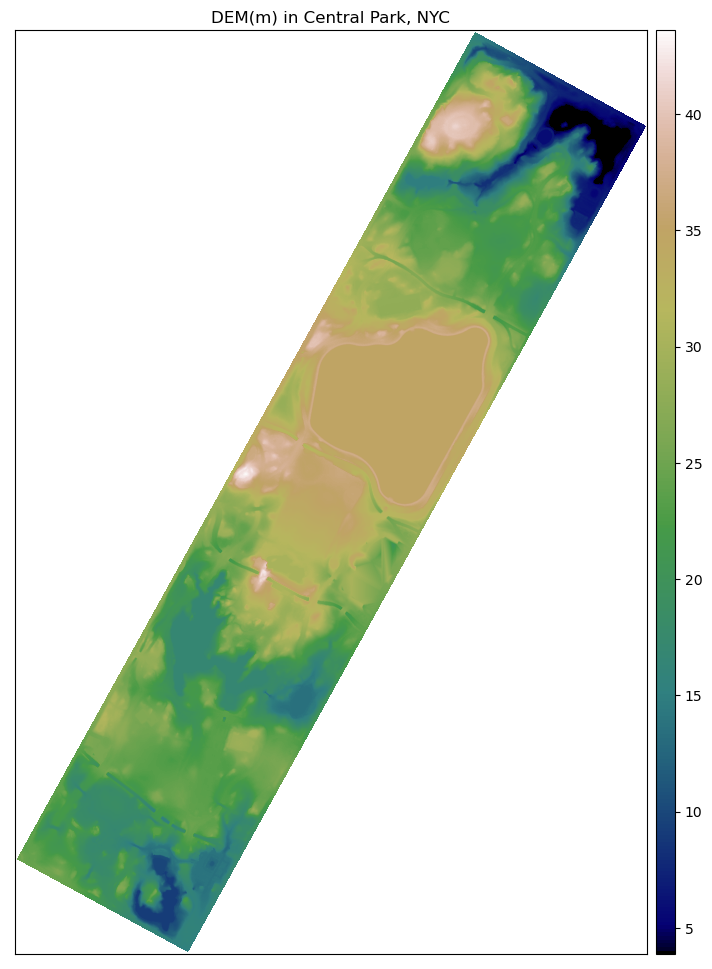

In [15]:
ep.plot_bands(dem, cmap = 'gist_earth', title='DEM (m) in Central Park, NYC', figsize=(20,12))
plt.show()

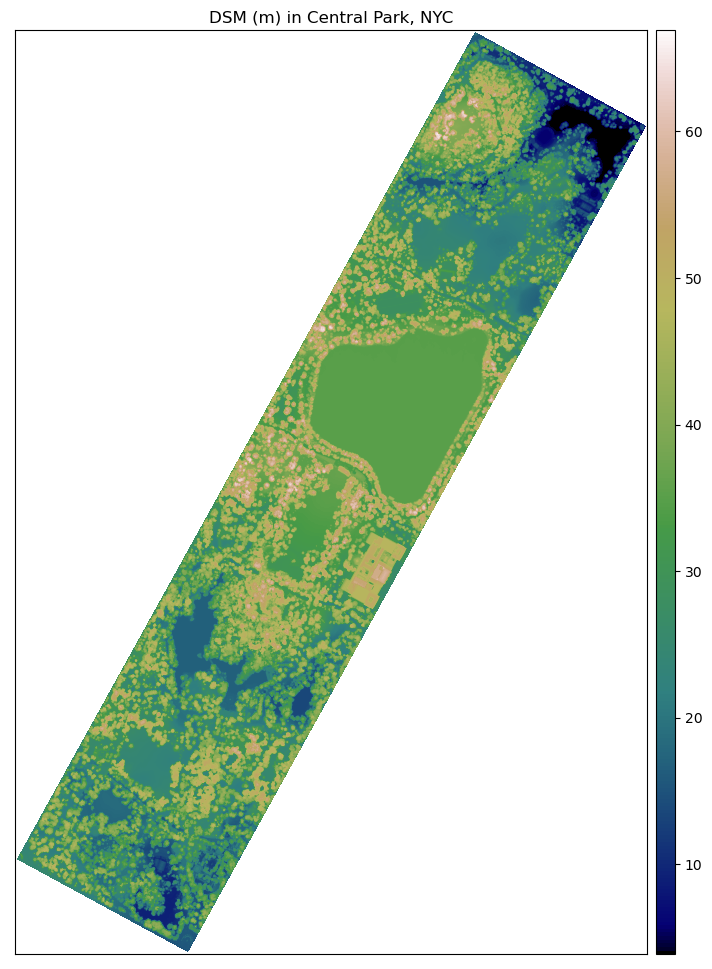

In [17]:
ep.plot_bands(dsm, cmap= 'gist_earth', title='DSM (m) in Central Park, NYC',
                figsize=(20,12))
plt.show()

In [19]:
# determinme whether the bounds are the same
print(dem.rio.bounds() == dsm.rio.bounds())

# determine whether the resolutiuon is the same
print(dsm.rio.resolution() == dsm.rio.resolution())

# calculate the canopy height model
chm = dsm.values - dem.values

False
True


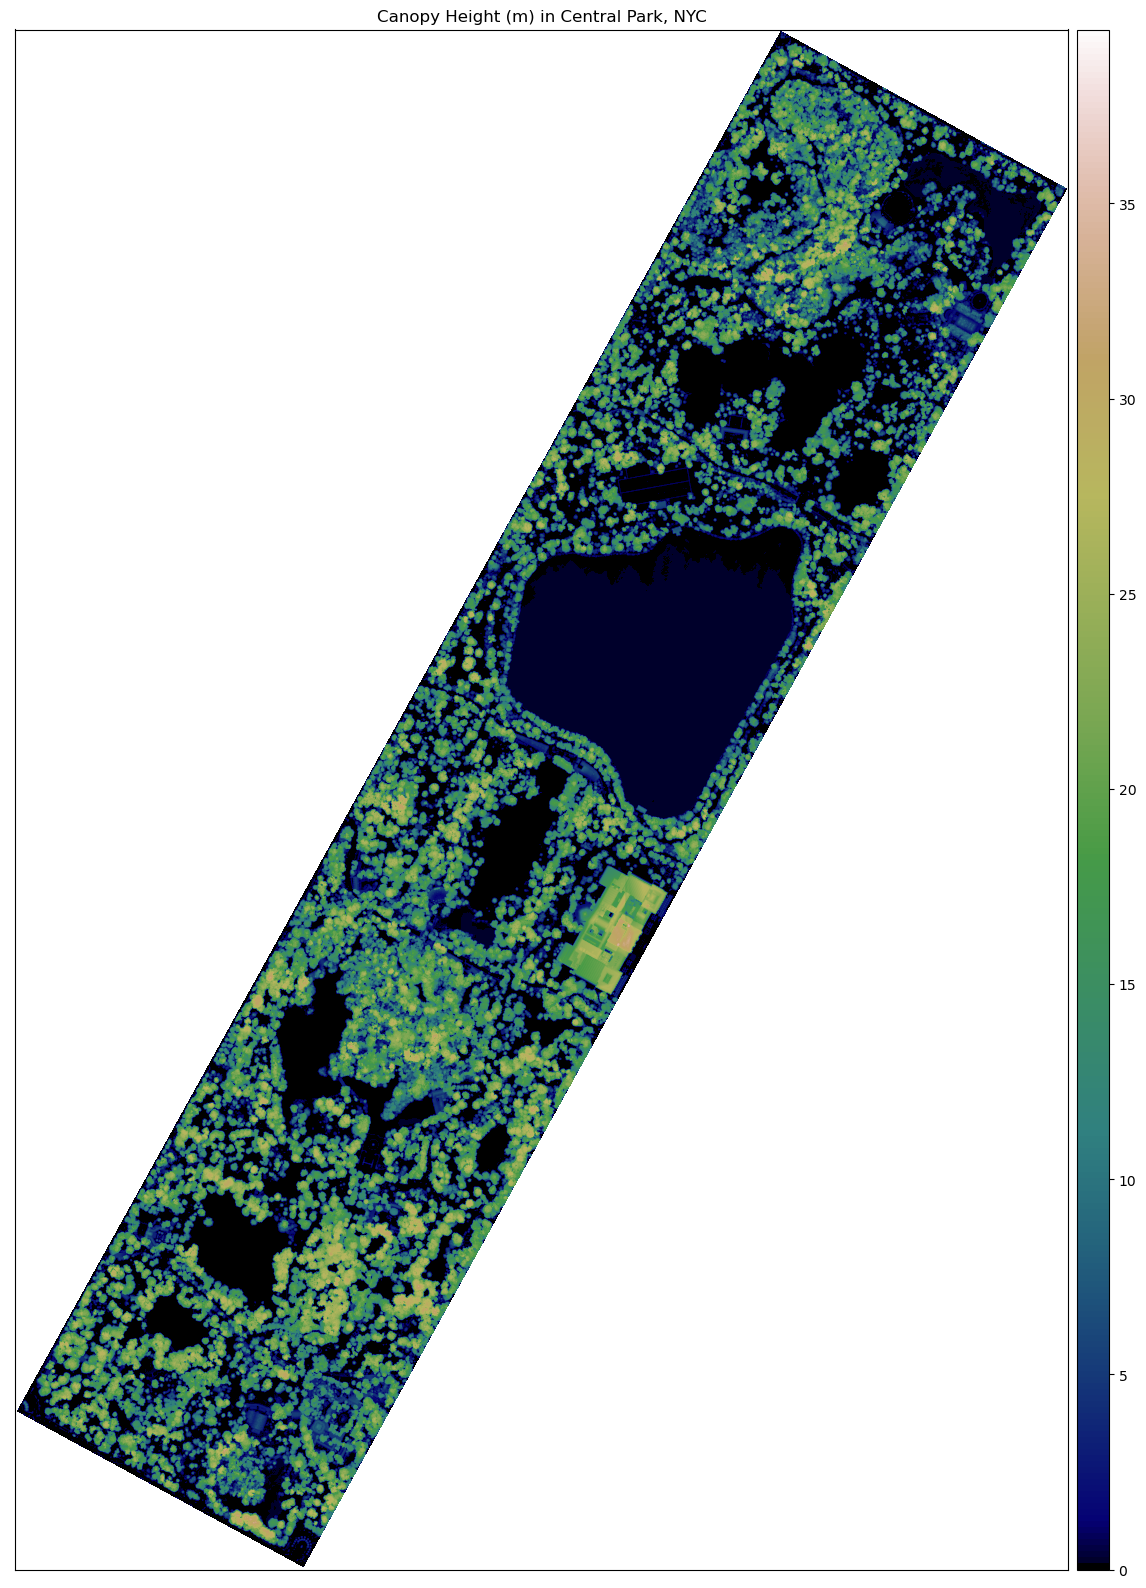

<AxesSubplot: title={'center': 'Canopy Height (m) in Central Park, NYC'}>

In [20]:
# plot CHM
ep.plot_bands(chm,cmap='gist_earth', title='Canopy Height (m) in Central Park, NYC',
                figsize=(20,20),
                cbar = True)